### Solution for "Points inside rectangle" problem from InterviewBits
[Problem details](https://www.interviewbit.com/problems/points-inside-rectangle/)

In [1]:
import math

EPS = 1e-10


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return '({0}, {1})'.format(str(self.x), str(self.y))

    def __eq__(self, other):
        return abs(self.x - other.x) < EPS and abs(self.y - other.y) < EPS

    def subtract(self, pt):
        self.x -= pt.x
        self.y -= pt.y

    def subtracted(self, pt):
        copy = self.clone()
        copy.subtract(pt)
        return copy

    def clone(self):
        return Point(self.x, self.y)

    def rotate(self, rho):
        if rho == 0 or (self.x == 0 and self.y == 0):
            return
        radius = self.radius()
        self_rho = self.rho() + rho
        self.x = radius * math.cos(self_rho)
        self.y = radius * math.sin(self_rho)

    def rotated(self, rho):
        c = self.clone()
        c.rotate(rho)
        return c

    def rho(self):
        return math.atan2(self.y, self.x)

    def radius(self):
        return math.sqrt(self.x * self.x + self.y * self.y)


def find_lowest_leftmost_point(pts):
    return min(pts, key=lambda p: (p.y, p.x))


def find_rightmost_lowest_point(pts):
    return max(pts, key=lambda p: (p.x, -p.y))


def find_points_inside_rect(rect_xs, rect_ys, pts_xs, pts_ys):
    rect_pts = list(Point(*p) for p in zip(rect_xs, rect_ys))
    base_pt = find_lowest_leftmost_point(rect_pts).clone()

    rect_pts = [p.subtracted(base_pt) for p in rect_pts]

    p1 = find_rightmost_lowest_point(rect_pts)

    if abs(p1.x) < EPS:
        return []

    base_rho = math.atan2(p1.y, p1.x)

    rect_height = 0
    rect_width = 0
    for p in rect_pts:
        p.rotate(-base_rho)
        if p.x > rect_width:
            rect_width = p.x
        if p.y > rect_height:
            rect_height = p.y

    result_pts = []

    for x, y in zip(pts_xs, pts_ys):
        p = Point(x, y)
        p.subtract(base_pt)
        p.rotate(-base_rho)
        if 0 < p.x < rect_width and 0 < p.y < rect_height:
            result_pts.append((x, y))

    return result_pts

### <font color='red'>Failure</font>
It fails to pass the test case below
```
Wrong Answer. Your program's output doesn't match the expected output. You can try testing your code with custom input and try putting debug statements in your code.
Your submission failed for the following input:
A : [ 757806, 870553, 1208794, 1096047 ]
B : [ 750581, 637834, 976075, 1088822 ]
C : [ -960840, -955568, -948123, -944567, -932689, -909006, -899213, -872499, -816231, -815487, -745458, -733965, -731767, -724160, -674483, -668124, -638622, -626199, -601653, -558231, -555957, -545997, -544386, -543614, -535798, -534548, -515867, -476700, -475144, -469624, -458175, -438328, -417182, -381407, -371638, -337506, -329494, -310312, -294120, -293259, -286345, -239709, -236737, -226459, -101763, -95015, -92985, -45365, -39041, -16265, 14345, 20699, 43223, 59858, 80467, 155882, 178162, 185280, 219005, 232976, 270563, 279358, 282342, 289593, 290780, 317859, 329292, 341423, 361695, 393776, 422139, 433328, 444707, 470220, 508399, 509636, 516573, 532007, 537797, 541645, 542654, 606489, 609080, 614672, 617072, 619918, 626655, 690373, 721697, 723175, 750776, 763166, 771255, 814811, 829093, 887413, 898447, 908990, 923037, 935731 ]
D : [ -567401, -305898, -133127, 306804, -128699, 994624, -618554, -827823, 67682, 259449, 256638, 675439, 866179, 202790, -859640, -46451, -328534, 750143, 256970, -520372, -873728, 298573, -830382, 539967, -142881, 886848, -43491, -1859, -229702, 300055, 848590, -694308, -545489, 779474, 916511, -624980, 677863, 377492, 341491, -486602, 414689, 760790, 740840, -294549, -257631, -180968, -361856, -703029, -309178, -15868, -881165, 339541, -137928, -453872, -68725, -569599, -504392, 997206, -545062, 145377, -865567, 666039, -194872, 436167, 835283, -168730, 877227, 663200, -7680, -368684, -566371, 497670, -258796, 29626, -969593, 30447, -419927, -205084, -428907, -854872, 327835, -75951, -465094, -474657, 805466, 874210, 473763, -956825, -188138, -425076, -899816, 588745, -56595, 342698, 305541, 610272, -930175, 175954, 735343, 679916 ]

Your function returned the following : 1

The expected returned value : 5
```

### Let's check this out

Input copy-pasted from error message

In [2]:
rect_xs=[ 757806, 870553, 1208794, 1096047, 757806 ]
rect_ys=[ 750581, 637834, 976075, 1088822 , 750581]
pts_xs=[ -960840, -955568, -948123, -944567, -932689, -909006, -899213, -872499, -816231, -815487, -745458, -733965, -731767, -724160, -674483, -668124, -638622, -626199, -601653, -558231, -555957, -545997, -544386, -543614, -535798, -534548, -515867, -476700, -475144, -469624, -458175, -438328, -417182, -381407, -371638, -337506, -329494, -310312, -294120, -293259, -286345, -239709, -236737, -226459, -101763, -95015, -92985, -45365, -39041, -16265, 14345, 20699, 43223, 59858, 80467, 155882, 178162, 185280, 219005, 232976, 270563, 279358, 282342, 289593, 290780, 317859, 329292, 341423, 361695, 393776, 422139, 433328, 444707, 470220, 508399, 509636, 516573, 532007, 537797, 541645, 542654, 606489, 609080, 614672, 617072, 619918, 626655, 690373, 721697, 723175, 750776, 763166, 771255, 814811, 829093, 887413, 898447, 908990, 923037, 935731 ]
pts_ys=[ -567401, -305898, -133127, 306804, -128699, 994624, -618554, -827823, 67682, 259449, 256638, 675439, 866179, 202790, -859640, -46451, -328534, 750143, 256970, -520372, -873728, 298573, -830382, 539967, -142881, 886848, -43491, -1859, -229702, 300055, 848590, -694308, -545489, 779474, 916511, -624980, 677863, 377492, 341491, -486602, 414689, 760790, 740840, -294549, -257631, -180968, -361856, -703029, -309178, -15868, -881165, 339541, -137928, -453872, -68725, -569599, -504392, 997206, -545062, 145377, -865567, 666039, -194872, 436167, 835283, -168730, 877227, 663200, -7680, -368684, -566371, 497670, -258796, 29626, -969593, 30447, -419927, -205084, -428907, -854872, 327835, -75951, -465094, -474657, 805466, 874210, 473763, -956825, -188138, -425076, -899816, 588745, -56595, 342698, 305541, 610272, -930175, 175954, 735343, 679916 ]

Utility

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def scatter_pts(pts, x_offset=5000, y_offset=5000, skip_index=False, skip_coords=True, **args):
    xs = [p.x for p in pts]
    ys = [p.y for p in pts]
    plt.scatter(xs, ys, **args)
    if not skip_index:
        for i, p in enumerate(pts):
            plt.text(p.x + x_offset, p.y + y_offset, str(i))
    if not skip_coords:
        for p in pts:
            plt.text(p.x, p.y, str(p))
    
def plot_pts(pts, x_offset=5000, y_offset=5000, skip_index=False, skip_coords=True, **args):
    xs = [p.x for p in pts]
    ys = [p.y for p in pts]
    plt.plot(xs, ys, 'r-', **args)
    if not skip_index:
        for i, p in enumerate(pts):
            plt.text(p.x + x_offset, p.y + y_offset, str(i))
    if not skip_coords:
        for p in pts:
            plt.text(p.x, p.y, str(p))

In [5]:
class Transformation:
    def __init__(self, subtract_pt, rho):
        self.subtract_pt = subtract_pt
        self.rho = rho

    def __repr__(self):
        return 'Transformation(%s, %f)' % (self.subtract_pt, self.rho)

    def move_pt(self, pt):
        return pt.subtracted(self.subtract_pt)

    def transform_pt(self, pt):
        c = pt.subtracted(self.subtract_pt)
        c.rotate(-self.rho)
        return c

    def transform(self, pts):
        return [self.transform_pt(p) for p in pts]

    def move(self, pts):
        return [self.move_pt(p) for p in pts]


def make_points(xs, ys):
    return list(Point(*p) for p in zip(xs, ys))


def build_transformation(rect_xs, rect_ys):
    rect_pts = list(Point(*p) for p in zip(rect_xs, rect_ys))
    p0 = find_lowest_leftmost_point(rect_pts).clone()

    rect_pts = [p.subtracted(p0) for p in rect_pts]

    p1 = find_rightmost_lowest_point(rect_pts)

    base_radius = p1.radius()
    if base_radius == 0:
        return []

    base_rho = math.acos(p1.x / base_radius)

    return Transformation(subtract_pt=p0, rho=base_rho)

In [6]:
transform = build_transformation(rect_xs, rect_ys)

Original points

In [7]:
rect_pts = make_points(rect_xs, rect_ys)
pts = make_points(pts_xs, pts_ys)

Translated points

In [8]:
m_rect_pts = transform.move(rect_pts)
m_pts = transform.move(pts)

Transformed points (translated + rotated)

In [9]:
t_rect_pts = transform.transform(rect_pts)
t_pts = transform.transform(pts)

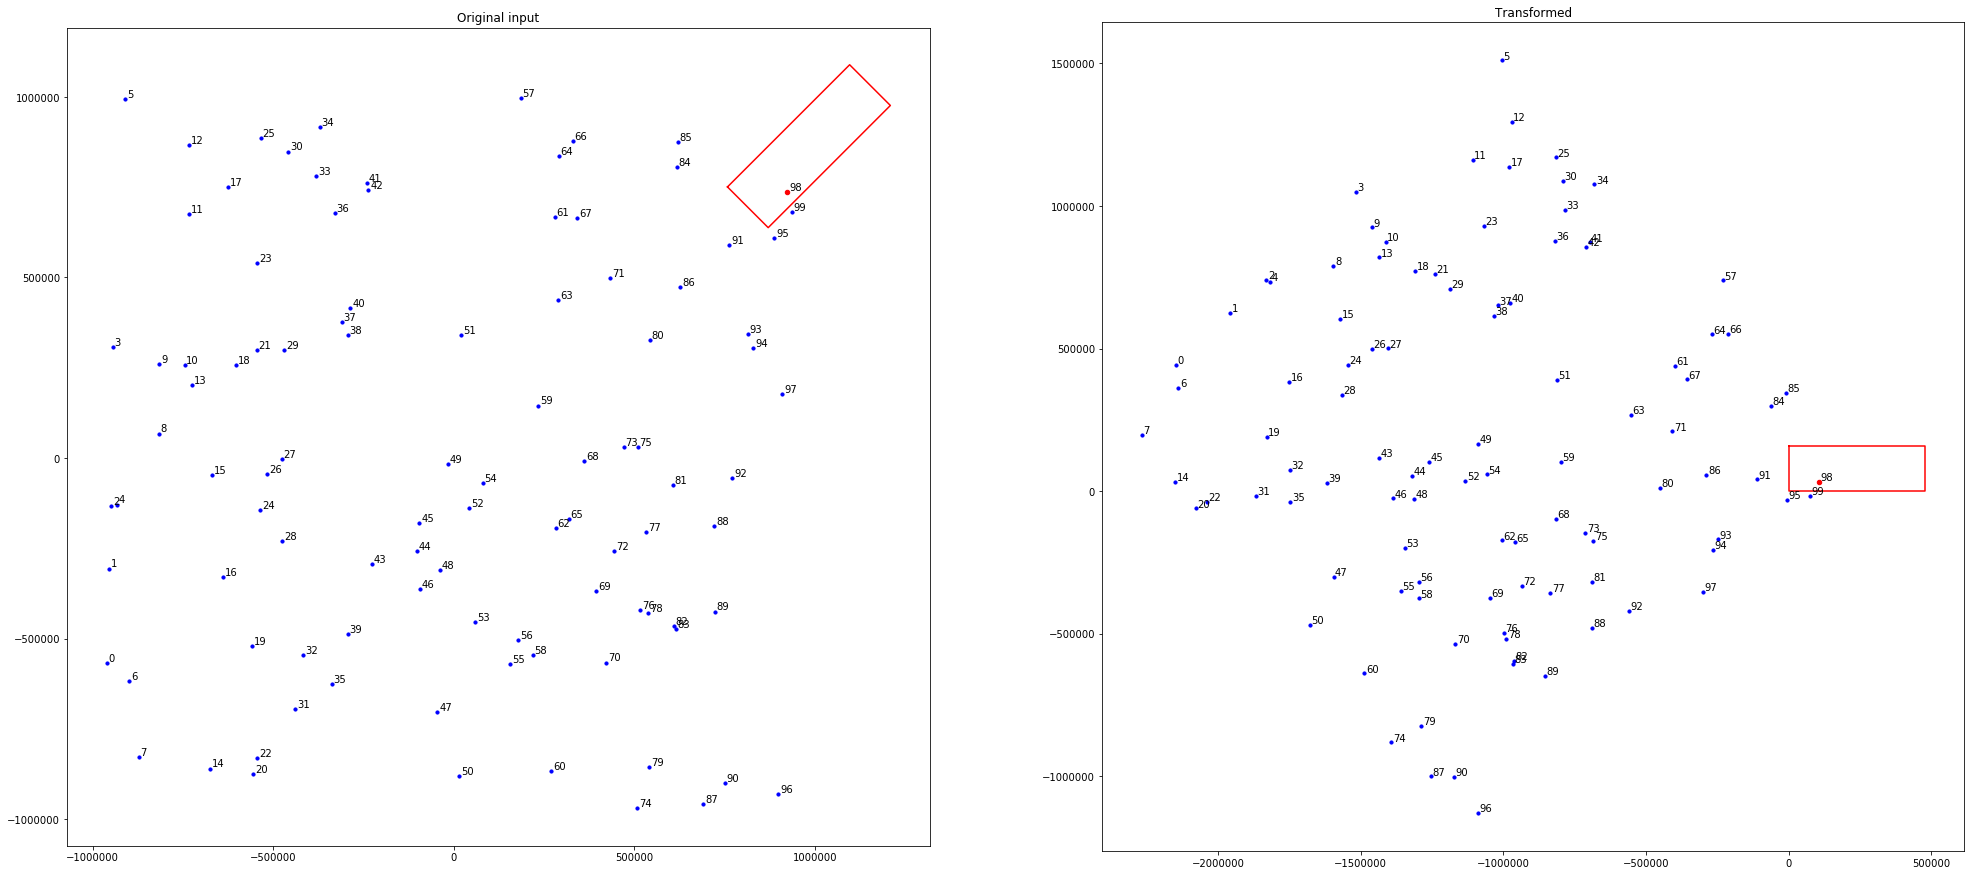

In [10]:
fig = plt.figure(figsize=(34, 17))
ax = fig.add_subplot(1, 2, 1)
ax.set_aspect(1)
ax.set_title('Original input')
plot_pts(rect_pts, skip_index=True)
scatter_pts(pts, s=10, c='b')
plt.scatter([pts[98].x], [pts[98].y], c='r', s=20)

ax = fig.add_subplot(1, 2, 2)
ax.set_aspect(1)
ax.set_title('Transformed')
plot_pts(t_rect_pts, skip_index=True)
scatter_pts(t_pts, s=10, c='b')
plt.scatter([t_pts[98].x], [t_pts[98].y], c='r', s=20)


plt.show()

This looks like there's only one point in the rectangle.